<a href="https://colab.research.google.com/github/CleberSalustiano/AI_IFES/blob/main/Trabalhos/IAT02_CLEBERSALUSTIANO_ELLENNEVES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo: ÉLLEN OLIVEIRA SILVA NEVES (20202BSI0071) e CLÉBER DE JESUS SALUSTIANO (20202BSI0268).

TRABALHO SOLICITADO PELO PROFESSOR DE INTELIGÊNCIA ARTIFICIAL, SÉRGIO NERY SIMÕES

# Importações

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math

# Função para executar os algoritmos

In [ ]:
def execute_n_times(algorithms, n_times):
    """
    Executa algoritmos de otimização várias vezes e armazena os resultados em um DataFrame.

    Parameters:
    algorithms (dict): Dicionário contendo os algoritmos de otimização e suas funções correspondentes.
    n_times (int): Número de execuções para cada algoritmo.

    Returns:
    pd.DataFrame: DataFrame contendo os custos resultantes de cada execução.
    list: Lista contendo os melhores resultados de cada rodada para todos os algoritmos.
    list: Lista contendo os melhores resultados até o momento para todos os algoritmos.
    """
    # Inicializa um DataFrame para armazenar os resultados
    algorithm_names = list(algorithms.keys())
    df_cost = pd.DataFrame(np.zeros((len(algorithm_names), n_times)), index=algorithm_names)
    df_cost.index.name = 'ALGORITMO'

    print('DataFrame inicial:\n', df_cost)
    bests_round_list = []
    bests_moments_list = []

    # Itera sobre os algoritmos e executa-os n vezes
    for algorithm_name, algorithm_function in algorithms.items():
        for i in range(n_times):
            # Executa o algoritmo correspondente
            if algorithm_name == 'Hill Climbing Restart':
                num_restarts = 20
                max_iterations_hcr = 50
                best_route_hc, best_distance_hc, _, best_round, best_moment = hill_climbing_with_restart(num_restarts, max_iterations_hcr)
                df_cost.loc[algorithm_name, i] = best_distance_hc
            elif algorithm_name == 'Simulated Annealing':
                initial_temperature = 1
                cooling_rate = 1 / 900
                max_iterations_sa = 1000
                best_route_sa, best_distance_sa, _, best_round, best_moment = simulated_annealing(initial_temperature, cooling_rate, max_iterations_sa)
                df_cost.loc[algorithm_name, i] = best_distance_sa
            elif algorithm_name == 'Genetic Algorithm':
                population_size = 20
                num_generations = 50
                mutation_rate = 0.3  # 30%
                best_route_ga, best_distance_ga, _, best_round, best_moment = genetic_algorithm(population_size, num_generations, mutation_rate)
                df_cost.loc[algorithm_name, i] = best_distance_ga

            # Armazena os melhores resultados de cada rodada
            bests_round_list.append(best_round)
            bests_moments_list.append(best_moment)

    print('\nDataFrame final:\n', df_cost)
    return df_cost, bests_round_list, bests_moments_list


# Funções para auxiliar os algoritmos

In [ ]:
# Função para calcular a quantidade de rainhas se atacando
def calculate_cost(state):
    """
    Calcula o custo associado à configuração atual do tabuleiro.

    Parameters:
    state (list): Configuração atual do tabuleiro.

    Returns:
    int: Custo representando a quantidade de rainhas se atacando.
    """
    cost = 0
    num_queens = len(state)

    # Itera sobre todas as rainhas no tabuleiro
    for i in range(num_queens):
        # Itera sobre as rainhas seguintes para verificar ataques
        for j in range(i + 1, num_queens):
            # Verifica se há ataques na mesma linha ou diagonal
            if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                cost += 1

    return cost


In [ ]:
# Função para gerar vizinhos
def generate_neighbors(state):
    """
    Gera vizinhos modificando uma única posição na configuração do tabuleiro.

    Parameters:
    state (list): Configuração atual do tabuleiro.

    Returns:
    list: Lista de vizinhos.
    """
    neighbors = []
    num_queens = len(state)

    # Itera sobre todas as colunas
    for col in range(num_queens):
        # Itera sobre todas as linhas
        for row in range(num_queens):
            # Cria um vizinho modificando a posição da rainha na coluna atual
            if row != state[col]:
                neighbor = state.copy()
                neighbor[col] = row
                neighbors.append(neighbor)

    return neighbors


# HIll Climbing With Restart

In [ ]:
# Algoritmo Hill-Climbing with Restart (HC-R)

# Função principal que executa o algoritmo Hill-Climbing with Restart
def hill_climbing_with_restart(num_restarts, max_iterations):
    # Inicialização das variáveis que armazenarão o melhor estado, melhor custo, custos das iterações,
    # melhores custos das rodadas e melhores custos até o momento
    best_state = None
    best_cost = float('inf')
    best_costs = []  # Lista para armazenar os custos de cada iteração
    best_rounds = []  # Lista para armazenar os melhores custos de cada rodada
    best_moments = []  # Lista para armazenar os melhores custos até o momento

    # Loop principal para realizar as iterações com reinicialização
    for _ in range(num_restarts):
        # Gera um estado inicial aleatório com 8 elementos
        state = [random.randint(0, 7) for _ in range(8)]
        cost = calculate_cost(state)
        better_cost = cost

        # Armazena o melhor custo da rodada atual e o melhor custo até o momento
        best_rounds.append(better_cost)
        best_moments.append(better_cost)

        # Loop para realizar as iterações do Hill-Climbing dentro de uma reinicialização
        for _ in range(max_iterations):
            # Gera os vizinhos do estado atual
            neighbors = generate_neighbors(state)

            # Encontra o melhor vizinho com base no custo
            best_neighbor = min(neighbors, key=calculate_cost)
            best_neighbor_cost = calculate_cost(best_neighbor)

            # Atualiza o estado se o vizinho tiver um custo melhor
            if best_neighbor_cost < cost:
                state = best_neighbor
                cost = best_neighbor_cost

            # Armazena o melhor custo da iteração atual
            best_costs.append(cost)

            # Atualiza o melhor custo da rodada e o melhor custo até o momento
            better_cost = min(better_cost, cost)
            if better_cost < best_cost:
                best_state = state
                best_cost = better_cost

            # Armazena o melhor custo da rodada atual e o melhor custo até o momento
            best_rounds.append(better_cost)
            best_moments.append(best_cost)

            # Verifica se atingiu o objetivo (custo zero)
            if cost == 0:
                return best_state, best_cost, best_costs, best_rounds, best_moments

    # Retorna os resultados após todas as reinicializações
    return best_state, best_cost, best_costs, best_rounds, best_moments


# Simulated Annealing

In [ ]:
# Algoritmo Simulated Annealing (SA)

# Função que implementa o algoritmo Simulated Annealing
def simulated_annealing(initial_temperature, cooling_rate, max_iterations):
    # Gera um estado inicial aleatório com 8 elementos
    state = [random.randint(0, 7) for _ in range(8)]
    cost = calculate_cost(state)
    best_state = state
    best_cost = cost
    best_costs = []  # Lista para armazenar os custos de cada iteração

    # Inicializa as listas para armazenar os melhores custos de cada rodada e os melhores custos até o momento
    best_rounds = [best_cost]
    best_moments = [best_cost]

    # Loop principal para realizar as iterações do Simulated Annealing
    for iteration in range(max_iterations):
        # Atualiza a temperatura com base na taxa de resfriamento
        temperature = initial_temperature * math.pow(cooling_rate, iteration)

        # Escolhe um vizinho aleatório do estado atual
        neighbor = random.choice(generate_neighbors(state))
        neighbor_cost = calculate_cost(neighbor)

        # Condição para aceitar o novo estado com base na probabilidade de aceitação do Simulated Annealing
        if temperature != 0 and (neighbor_cost < cost or math.exp((cost - neighbor_cost) / temperature) > random.random()):
            state = neighbor
            cost = neighbor_cost

            # Atualiza o melhor estado e melhor custo se o novo estado for melhor
            if cost < best_cost:
                best_state = state
                best_cost = cost

        # Armazena o melhor custo da iteração atual
        best_costs.append(best_cost)

        # Atualiza as listas de melhores custos das rodadas e melhores custos até o momento
        best_rounds.append(cost)
        best_moments.append(best_cost)

        # Verifica se atingiu o objetivo (custo zero)
        if best_cost == 0:
            return best_state, best_cost, best_costs, best_rounds, best_moments

    # Retorna os resultados após todas as iterações
    return best_state, best_cost, best_costs, best_rounds, best_moments


# Genetic Algorithm

In [ ]:
# Algoritmo Genetic Algorithm (GA)
def genetic_algorithm(population_size, num_generations, mutation_rate):
    num_queens = 8
    population = []
    best_rounds = []  # Lista para armazenar os melhores de cada rodada
    best_moments = []  # Lista para armazenar os melhores até o momento

    # Inicialização da população com estados aleatórios
    for _ in range(population_size):
        state = [random.randint(0, 7) for _ in range(num_queens)]
        population.append(state)

    best_state = None
    best_cost = float('inf')
    best_costs = []  # Lista para armazenar os custos de cada geração

    # Loop principal para as gerações do algoritmo genético
    for generation in range(num_generations):
        # Avaliação da população
        costs = [calculate_cost(state) for state in population]

        # Armazena o melhor custo da rodada atual
        best_rounds.append(min(costs))

        # Seleção dos pais (torneio binário)
        parents = []
        for _ in range(population_size // 2):
            idx1, idx2 = random.sample(range(population_size), 2)
            parent1 = population[idx1]
            parent2 = population[idx2]
            parents.append((parent1, parent2))

        # Reprodução (crossover de um ponto)
        offspring = []
        for parent1, parent2 in parents:
            crossover_point = random.randint(1, num_queens - 1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
            offspring.append(child1)
            offspring.append(child2)

        # Mutação
        for i in range(len(offspring)):
            if random.random() < mutation_rate:
                gene_idx = random.randint(0, num_queens - 1)
                new_gene = random.randint(0, num_queens - 1)
                offspring[i][gene_idx] = new_gene

        # Nova população (substituição dos indivíduos menos adaptados)
        population = offspring

        # Melhor indivíduo da geração atual
        best_idx = min(range(population_size), key=lambda x: costs[x])
        best_state = population[best_idx]
        best_cost = costs[best_idx]
        best_costs.append(best_cost)  # Armazena o melhor custo da geração atual

        # Armazena o melhor custo até o momento
        best_moments.append(min(best_costs))

        # Verifica se atingiu o objetivo (custo zero)
        if best_cost == 0:
            return best_state, best_cost, best_costs, best_rounds, best_moments

    # Retorna os resultados após todas as gerações
    return best_state, best_cost, best_costs, best_rounds, best_moments


Função para gerar boxplot dos algoritmos

In [ ]:
def boxplot_sorted(df, rot=90, figsize=(12, 6), fontsize=20):
    """
    Gera um boxplot ordenado de acordo com a mediana das colunas do DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame contendo os dados para o boxplot.
    rot (int, optional): Ângulo de rotação dos rótulos no eixo x. Padrão é 90.
    figsize (tuple, optional): Tamanho da figura. Padrão é (12, 6).
    fontsize (int, optional): Tamanho da fonte. Padrão é 20.

    Returns:
    matplotlib.axes._subplots.AxesSubplot: O objeto AxesSubplot contendo o boxplot.
    """
    # Transpõe o DataFrame para facilitar a ordenação
    df_transposed = df.T

    # Ordena as colunas com base na mediana
    meds = df_transposed.median().sort_values(ascending=False)

    # Gera o boxplot ordenado
    axes = df_transposed[meds.index].boxplot(figsize=figsize, rot=rot, fontsize=fontsize,
                                             boxprops=dict(linewidth=4, color='cornflowerblue'),
                                             whiskerprops=dict(linewidth=4, color='cornflowerblue'),
                                             medianprops=dict(linewidth=4, color='firebrick'),
                                             capprops=dict(linewidth=4, color='cornflowerblue'),
                                             flierprops=dict(marker='o', markerfacecolor='dimgray',
                                                             markersize=12, markeredgecolor='black'),
                                             return_type="axes")

    # Adiciona título ao boxplot
    axes.set_title("Custo dos Algoritmos", fontsize=fontsize)

    return axes


# Inicialização

In [ ]:
# Dicionario com Nomes dos modelos e suas respectivas variantes
algorithm = {'Hill Climbing Restart': hill_climbing_with_restart,'Genetic Algorithm': genetic_algorithm, 'Simulated Annealing': simulated_annealing}

In [ ]:
###################################
# PROBLEMA GERADO ALEATORIAMENTE  #
###################################
n_vezes = 10
# Executa N vezes para gerar estatísticas da variável custo
df_cost, best_rounds, best_moments = execute_n_times(algorithm,n_vezes)

DataFrame inicial:
                          0    1    2    3    4    5    6    7    8    9
ALGORITMO                                                              
Hill Climbing Restart  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Genetic Algorithm      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Simulated Annealing    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

DataFrame final:
                          0    1    2    3    4    5    6    7    8    9
ALGORITMO                                                              
Hill Climbing Restart  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Genetic Algorithm      5.0  3.0  4.0  7.0  4.0  5.0  5.0  4.0  5.0  5.0
Simulated Annealing    2.0  2.0  1.0  2.0  1.0  1.0  1.0  2.0  0.0  2.0


<Axes: title={'center': 'Custo dos Algoritmos'}>

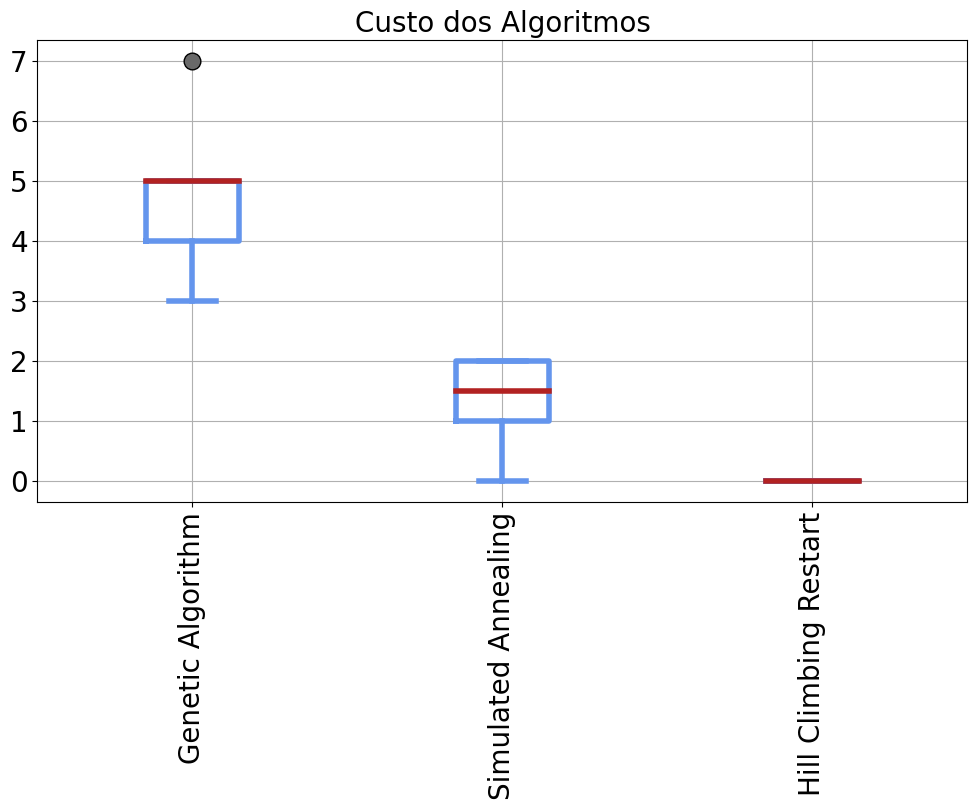

In [ ]:
boxplot_sorted(df_cost, rot=90, figsize=(12,6), fontsize=20)

# Gráficos de convergência

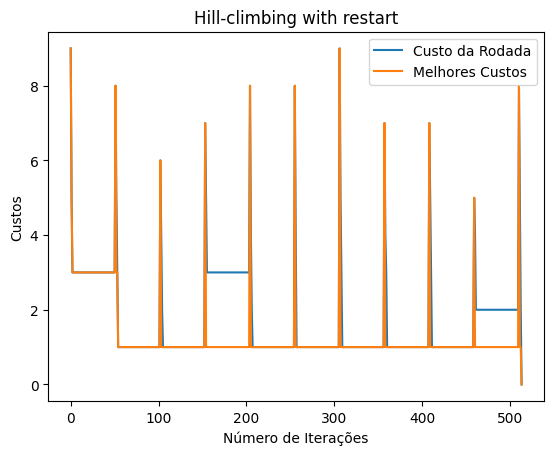

In [ ]:
# Plota gráfico de convergência e gráfico do custo de cada rodada HC
plt.plot(best_rounds[0], label='Custo da Rodada')  # Linha azul
plt.plot(best_moments[0], label='Melhores Custos')  # Linha laranja
plt.xlabel('Número de Iterações')
plt.ylabel('Custos')
plt.title('Hill-climbing with restart')
plt.legend()  # Adiciona a legenda ao gráfico
plt.show()  # Exibe o gráfico


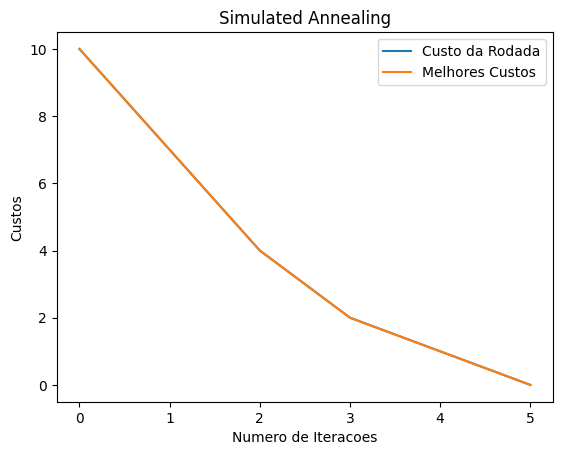

In [ ]:
# Plota gráfico de convergência e gráfico do custo de cada rodada SA
plt.plot(best_rounds[1], label='Custo da Rodada')  # Linha azul
plt.plot(best_moments[1], label='Melhores Custos') # Linha laranja
plt.xlabel('Numero de Iteracoes')
plt.ylabel('Custos')
plt.title('Simulated Annealing')
plt.legend()  # Adiciona a legenda ao gráfico
plt.show()  # Exibe o gráfico

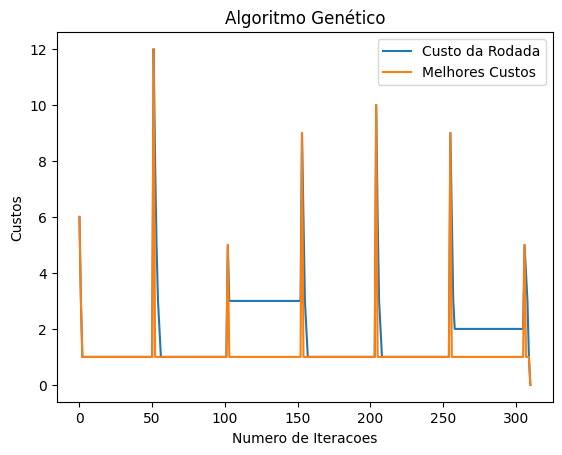

In [ ]:
# Plota gráfico de convergência e gráfico do custo de cada rodada AG
plt.plot(best_rounds[2], label='Custo da Rodada')  # Linha azul
plt.plot(best_moments[2], label='Melhores Custos') # Linha laranja
plt.xlabel('Numero de Iteracoes')
plt.ylabel('Custos')
plt.title('Algoritmo Genético')
plt.legend()  # Adiciona a legenda ao gráfico
plt.show()  # Exibe o gráfico

# Tabela de comparação entre os algoritmos

In [ ]:
df_cost.T.describe()

ALGORITMO,Hill Climbing Restart,Genetic Algorithm,Simulated Annealing
count,10.0,10.00000,10.000000
mean,0.0,4.70000,1.400000
std,0.0,1.05935,0.699206
min,0.0,3.00000,0.000000
25%,0.0,4.00000,1.000000
50%,0.0,5.00000,1.500000
75%,0.0,5.00000,2.000000
max,0.0,7.00000,2.000000


In [ ]:
pd.set_option("display.max.columns", None)
df_cost.head()

,0,1,2,3,4,5,6,7,8,9
ALGORITMO,,,,,,,,,,
Hill Climbing Restart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Genetic Algorithm,5.0,3.0,4.0,7.0,4.0,5.0,5.0,4.0,5.0,5.0
Simulated Annealing,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0
